### Active Organizational Network Analysis

In this part of ONA, we are going to dive into the topic of "Collaboration". The questions we would like to answer as follows:

* How is overall collaboration in the organization?
* Compare teams’ collaborations using their average centrality measures.
* Collaboration across Functional Boundaries - where collaboration is and is not occurring?
* Is there new hire onborading probelm in the organization?

In [1]:
# import library

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import scipy as sp
from netgraph import Graph
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib as matplotlib

%matplotlib inline

In [2]:
# Reading MS graph people API data

s_people = pd.read_csv('active_survey_new.csv')
s_people.head()

,Employee ID_recipient,Employee ID_adviser,go to reason,advice area count,energy level,Employment Type_recipient,Position Title_recipient,Date in service_recipient,On Site Frequency_recipient,Business Unit level 1_recipient,Business Unit level 2_recipient,Employment Type_adviser,Position Title_adviser,Date in service_adviser,On Site Frequency_adviser,Business Unit level 1_adviser,Business Unit level 2_adviser
0,3029869,2002956,Delivering to\nCustomers,1,Goes up,Salaried,Workforce Analyst I,2013-03-05,Hybrid,Brand 2,Customer Service - Brand 2,Salaried,"Manager, Customer Service",2017-05-15,Hybrid,Brand 2,Customer Service - Brand 2
1,2003137,2003173,"Financial\nResources,Navigating\nChange,Career...",4,Goes up sharply,Salaried,"Spvsr, Customer Service I",2013-03-04,Hybrid,Brand 2,Customer Service - Brand 2,Salaried,"Sr. Manager, Customer Service",2014-03-24,Hybrid,Brand 2,Customer Service - Brand 2
2,2003173,3021660,"Navigating\nChange,Technical\nExpertise",2,Stays about the same,Salaried,"Sr. Manager, Customer Service",2014-03-24,Hybrid,Brand 2,Customer Service - Brand 2,Salaried,"Sr. Director, eCommerce",2022-05-09,Hybrid,Corporate,Engineering - Brand 2
3,3021784,2002680,"Navigating\nChange,Career\nDevelopment,Deliver...",3,Goes up sharply,Hourly,Customer Service Representative 3,2022-05-09,Fully Remote,Brand 2,Customer Service - Brand 2,Salaried,Collaborations Specialist I,2020-06-16,Hybrid,Brand 2,Marketing - Brand 2
4,3044041,2003115,Delivering to\nCustomers,1,Goes up sharply,Salaried,Sr. Social Media Specialist II,2024-04-08,Hybrid,Brand 2,Marketing - Brand 2,Salaried,Social Media Specialist I,2021-03-01,Hybrid,Brand 2,Marketing - Brand 2


In [3]:
# calculate how many connections are within the team in the Brand 2 organization

bridge = s_people[s_people['Business Unit level 2_recipient'] == s_people['Business Unit level 2_adviser']]
print('Connections within team % :', len(bridge)/len(s_people))


Connections within team % : 0.648881239242685


In [4]:
s_people[s_people['Business Unit level 2_adviser'] == 'Leadership']

,Employee ID_recipient,Employee ID_adviser,go to reason,advice area count,energy level,Employment Type_recipient,Position Title_recipient,Date in service_recipient,On Site Frequency_recipient,Business Unit level 1_recipient,Business Unit level 2_recipient,Employment Type_adviser,Position Title_adviser,Date in service_adviser,On Site Frequency_adviser,Business Unit level 1_adviser,Business Unit level 2_adviser
26,3021660,3040598,"Financial\nResources,Navigating\nChange,Career...",4,Goes up,Salaried,"Sr. Director, eCommerce",2022-05-09,Hybrid,Corporate,Engineering - Brand 2,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership
32,3042370,3040598,"Financial\nResources,Navigating\nChange,Career...",4,Goes up,Salaried,"Director, Growth - Brand 2",2023-11-27,Fully Remote,Brand 2,Marketing - Brand 2,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership
210,2003171,3040598,"Financial\nResources,Delivering to\nCustomers",2,Stays about the same,Hourly,Customer Service Representative 4,2021-07-19,Fully Remote,Brand 2,Customer Service - Brand 2,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership
288,2003148,3040598,"Financial\nResources,Navigating\nChange,Career...",4,Goes up,Salaried,"Sr. Director, Marketing",2015-11-16,Hybrid,Brand 2,Marketing - Brand 2,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership
300,3033414,3040598,"Financial\nResources,Navigating\nChange,Career...",5,Stays about the same,Salaried,Sr. Merchandising Specialist I,2023-04-10,Fully Remote,Brand 2,Product Merchandising - Brand 2,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership
329,3029869,3027224,Technical\nExpertise,1,Stays about the same,Salaried,Workforce Analyst I,2013-03-05,Hybrid,Brand 2,Customer Service - Brand 2,Salaried,"SVP, Chief Human Resources Officer",2022-08-29,Fully Remote,Corporate,Leadership
389,3029900,3040598,"Financial\nResources,Navigating\nChange,Career...",4,Goes up sharply,Salaried,"Sr. Manager, Channel Marketing",2022-11-14,Fully Remote,Brand 2,Marketing - Brand 2,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership
392,3038672,3040598,"Navigating\nChange,Delivering to\nCustomers",2,Goes up sharply,Salaried,Sr. Data Engineer I,2023-09-18,Hybrid,Corporate,Engineering - Brand 2,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership
482,2002909,3040598,Delivering to\nCustomers,1,Goes up,Salaried,Sr. Principal Designer - UX Design,2015-11-18,Hybrid,Corporate,Engineering - Brand 2,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership
520,2003036,3040598,"Financial\nResources,Career\nDevelopment,Deliv...",3,Goes up,Salaried,"Director, Sales",2021-02-15,Hybrid,Brand 2,Sales - Brand 2,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership


In [5]:
# calculate how many connections are inside the Brand 2 organization

in_sf= s_people[s_people['Business Unit level 2_adviser'].isin(['Product Merchandising - Brand 2', 
                                                                     'Engineering - Brand 2',
                                                                     'Marketing - Brand 2', 
                                                                     'Customer Service - Brand 2',
                                                                     'Sales - Brand 2',#])]
                                                                     'Leadership'])]
in_sf1 = in_sf[in_sf['Employee ID_adviser']!=3027224]
print('Connections inside of the Brand 2 organization % :', len(in_sf1)/len(s_people))

Connections inside of the Brand 2 organization % : 0.9242685025817556


In [6]:
# calculate how many connections are outside the Brand 2 organization

out_sf= s_people[~s_people['Business Unit level 2_adviser'].isin(['Product Merchandising - Brand 2', 
                                                                     'Engineering - Brand 2',
                                                                     'Marketing - Brand 2', 
                                                                     'Customer Service - Brand 2',
                                                                     'Sales - Brand 2',])]
                                                                     #'Leadership'])]

out_sf1=out_sf[out_sf['Employee ID_adviser'] != 3040598]
print('Connections outside of the Brand 2 organization % :', len(out_sf1)/len(s_people))


Connections outside of the Brand 2 organization % : 0.0757314974182444


In [7]:
# loading hr information with centralities values

hr_df = pd.read_csv('active_hr_new.csv')
len(hr_df)


111

In [8]:
# display hr_df dataframe columns

hr_df.columns

Index(['Employee ID', 'On Site Frequency', 'Position Title', 'Date in service',
       'Business Unit level 1', 'Business Unit level 2'],
      dtype='object')

In [12]:
#read hr centrality information csv file

hr_cen = pd.read_csv('active_centrality.csv')
hr_cen.head()

,Employee ID,Position ID,Position Title,Employee Class,Employee Status,Employment Type,Date in service,Business Unit level 1,Business Unit level 2,Employee Grade,...,Manager ID,E-Staff,On Site Frequency,Data_as_of,Work State,team_abr,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
0,3022906,3022906,Sr. Software Development Engineer II,Regular Employee,Active,Salaried,2022-07-18,Corporate,Engineering - Brand 2,P4 - Individual Contributor 4 (Sr. II),...,3044059.0,3043957,Fully Remote,2024-07-15,Colorado,ENG_SF,0.090909,0.175288,0.000917,0.013977
1,3031509,3031509,Sr. Digital Marketing Specialist II,Regular Employee,Active,Salaried,2022-12-05,Corporate,Marketing,P4 - Individual Contributor 4 (Sr. II),...,3044594.0,3035762,Fully Remote,2024-07-15,Oregon,MKT_Corp,0.018182,0.218531,0.000000,0.038889
2,2003115,2003115,Social Media Specialist I,Regular Employee,Active,Salaried,2021-03-01,Brand 2,Marketing - Brand 2,P1 - Individual Contributor 1,...,2003148.0,3040598,Hybrid,2024-07-15,North Carolina,MKT_SF,0.118182,0.195991,0.001211,0.045019
3,3023646,3023646,Product Specialist II,Regular Employee,Active,Salaried,2022-08-01,Corporate,Engineering - Brand 2,P2 - Individual Contributor 2,...,2002394.0,3043957,Fully Remote,2024-07-15,New Jersey,ENG_SF,0.118182,0.270563,0.000000,0.043279
4,3018469,3018469,Corporate Attorney,Regular Employee,Active,Salaried,2021-11-22,Corporate,Legal,P5 - Individual Contributor 5 (Principal,...,3032019.0,3039277,Hybrid,2024-07-15,Minnesota,Legal_Corp,0.018182,0.195177,0.000000,0.006417


In [13]:
hr_cen['Business Unit level 1'].unique()

array(['Corporate', 'Brand 2', 'Operations'], dtype=object)

#### How is the overall collaboration in the organization

Using Centrality measures, including degree and closeness centrality to provide valuable insights into the structure and dynamics of the overall collaboration in the organization. 

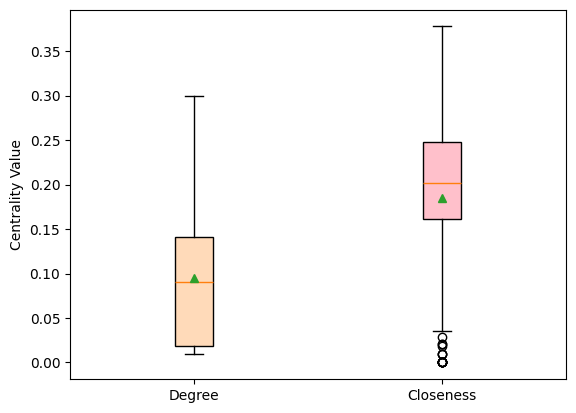

In [14]:
# plot a side by side boxplot to compare two centralities value for collaboration insights

centrality_value = [
    hr_cen['degree_centrality'],
    hr_cen['closeness_centrality'],  
]
labels = ['Degree', 'Closeness']
colors = ['peachpuff', 'pink']

fig, ax = plt.subplots()
ax.set_ylabel('Centrality Value')

bplot = ax.boxplot(centrality_value,
                   patch_artist=True,  # fill with color
                   tick_labels=labels,  # will be used to label x-ticks
                   showmeans=True)  # show mean value in boxplot

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

##### Key takeaway:

* 75% of the nodes' (employees') degree centrality value falls below 0.16.
* 75% of nodes' closeness centrality value lies above 0.15
* The majority of employees in an organizational network have closeness centrality values higher than their degree centrality values.

##### Conclusion:

Since the majority of employees in an organizational network have closeness centrality values higher than their degree centrality values, it suggests that these employees are relatively well-connected within the organization, even if they don't have a significant number of direct connections. This can indicate a few things:

1. **Efficient Communication**:  Closeness centrality measures how close a node is to all other nodes in the network, based on the shortest path distances. With high closeness centrality indicates that employees can reach others quickly through a few intermediaries, which can facilitate efficient communication and information flow.
2. **Strategic Positioning**: These employees might be strategically positioned within the organization, allowing them to access and disseminate information effectively without needing many direct connections.
3. **Network Structure**: The network might be structured in a way that emphasizes indirect connections and pathways, rather than dense clusters of direct connections.
4. **Potential Broker**: The employee with high closeness centrality but low degree centrality might act as a broker or intermediary, connecting different parts of the network indirectly.

This scenario can be common in hierarchical or matrix organizations where communication often flows through key intermediaries rather than through direct connections between all employees. In our case, it is a corporate network, such a employee (node) might represent a key individual who, despite having few direct reports or connections, is well-placed to influence or communicate with many parts of the organization.


##### Compare Teams’ collaborations using the average centrality measures.

In [15]:
hr_cen.columns

Index(['Employee ID', 'Position ID', 'Position Title', 'Employee Class',
       'Employee Status', 'Employment Type', 'Date in service',
       'Business Unit level 1', 'Business Unit level 2', 'Employee Grade',
       'FTE', 'Full Time', 'Job Level Grouping', 'Legal Entity level 1',
       'Location level 1', 'Location level 2', 'Manager ID', 'E-Staff',
       'On Site Frequency', 'Data_as_of', 'Work State', 'team_abr',
       'degree_centrality', 'closeness_centrality', 'betweenness_centrality',
       'eigenvector_centrality'],
      dtype='object')

In [16]:
hr_b2 = hr_cen[hr_cen['Business Unit level 2'].isin(
    ['Engineering - Brand 2', 
     'Marketing - Brand 2',
     'Product Merchandising - Brand 2', 
     'Customer Service - Brand 2', 
     'Sales - Brand 2']
)]

##### Bar Chart for Teams' Average Degree Centrality 

We are comparing teams’ collaborations using each team's average centrality measures in the organization. Centrality measures includes degree, betweenness, closeness, and eigenvector centrality, which can provide valuable insights into the structure and dynamics of team collaborations. By calculating and comparing these average centrality measures, we can gain insights into how different teams
 collaborate and their roles within the broader organizational network.

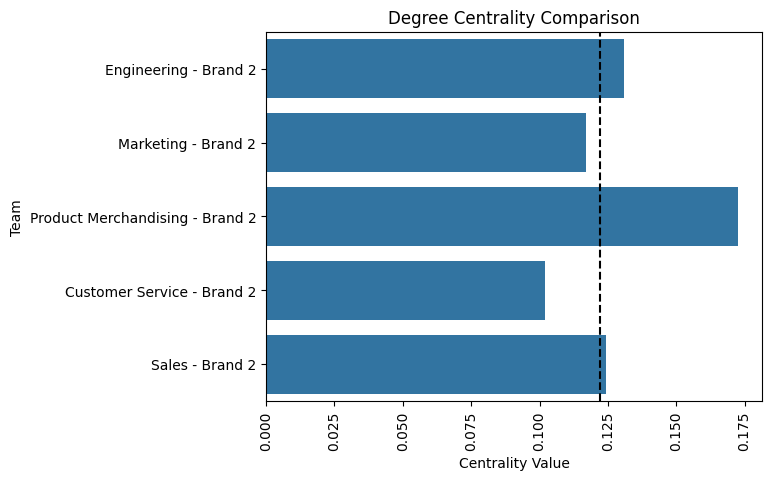

In [17]:
# Construct Bar Chart for degree centrality: 
# These are straightforward and effective for comparing averages. 
# Each bar represents a team, and the height of the bar indicates the average degree centrality.

ax = sns.barplot(
    hr_b2, y="Business Unit level 2", x="degree_centrality",
    native_scale=True,
    estimator="mean", errorbar=None,
)

#draw a vertical line for the average degree centrality of the network
plt.axvline(x=hr_b2['degree_centrality'].mean(), 
          color='black', linestyle='--')

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Degree Centrality Comparison')
plt.xlabel('Centrality Value')
plt.ylabel('Team')
plt.show()

In a network with 111 nodes, the degree centrality of a node is calculated by dividing the number of connections (or edges) a node has by the maximum possible connections, which is 110 (since each node can connect to 110 other nodes).

### **Typical Values for Degree Centrality**
- **Average Degree Centrality**: In many organizational networks, the average degree centrality can vary widely depending on the nature of the network. However, a common range is between 0.05 to 0.15. This means that, on average, each node is connected to about 5% to 15% of the other nodes.
- **High Degree Centrality**: Nodes with high degree centrality might have values closer to 0.2 or higher, indicating they are connected to a significant portion of the network.

### **Example Calculation**
If a node has 15 connections in a network of 111 nodes, its degree centrality would be:
$$
\text{Degree Centrality} = \frac{15}{110} \approx 0.136
$$

### **Interpreting Degree Centrality**
- **Low Degree Centrality**: Indicates a node is less connected and possibly on the periphery of the network.
- **High Degree Centrality**: Suggests a node is well-connected and potentially influential within the network.



##### Key Takeaway:

**Degree Centrality**:

* Interpretation: Measures the number of direct connections a node (team
member) has, in other words - it's a count of how many social connections a employee has in this organization. High average degree centrality in a team indicates that team members are well-connected and likely to collaborate frequently.

* Comparison: Teams with higher average degree centrality might be more
cohesive and have better internal communication. 

**Conclusion**: 
In our case, the bar chart shows that product merchandising team has highest average value on degree centrality. Which means that team members in the product merchandising team are well-connected and may indicates these employees play central roles in communication and collaboration within the organization. In addition, for a organizational network of the size of 111, high degree centrality values might be in the range of 0.15 to 0.2, depending on the density of connections. Thus, the average degree centrality in the product merchandising team would be considered as a high degree centrality.

##### Bar Chart for Teams' Average Closeness Centrality 

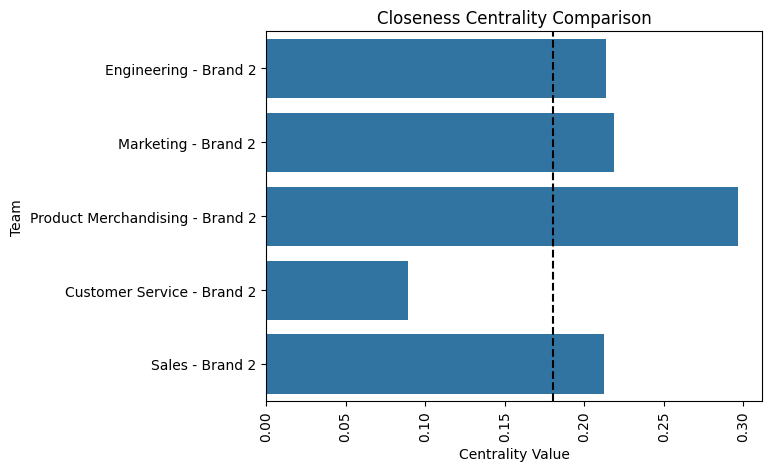

In [18]:
# Construct Bar Chart for closeness centrality: 

ax = sns.barplot(
    hr_b2, y="Business Unit level 2", x="closeness_centrality",
    native_scale=True,
    estimator="mean", errorbar=None,
)

#add a vertical line for the average closeness centrality of the network
plt.axvline(x=hr_b2['closeness_centrality'].mean(), 
          color='black', linestyle='--')

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Closeness Centrality Comparison')
plt.xlabel('Centrality Value')
plt.ylabel('Team')
plt.show()

##### Key Takeaway:

**Closeness Centrality**:
 - Interpretation: Closeness Centrality measures how close a node (an employee) is to all other nodes (employees) in the network. High average closeness centrality indicates that team members can quickly reach others in the network.
 - Comparison: Teams with higher average closeness centrality might be more efficient in disseminating information and coordinating activities.

**Conclusion**:
As we can see from the bar chart above that comparing closeness centrality between teams, the product merchanising team has the relatively high value on closeness centrality than other teams, which might indicates these two teams are central to the network, meaning they can communicate and disseminate information rapidly across the organization. The engineering, marketing and sales teams have similar value on the closeness centrality. 

On the other hand, the bar chart shows the customer service teams has relatively low closeness centrality values, which might indicate that some employees in the team are more peripheral and takes longer to reach other employees - a sign of potential isolation.

##### Bar Chart for Teams' Average Betweenness Centrality 

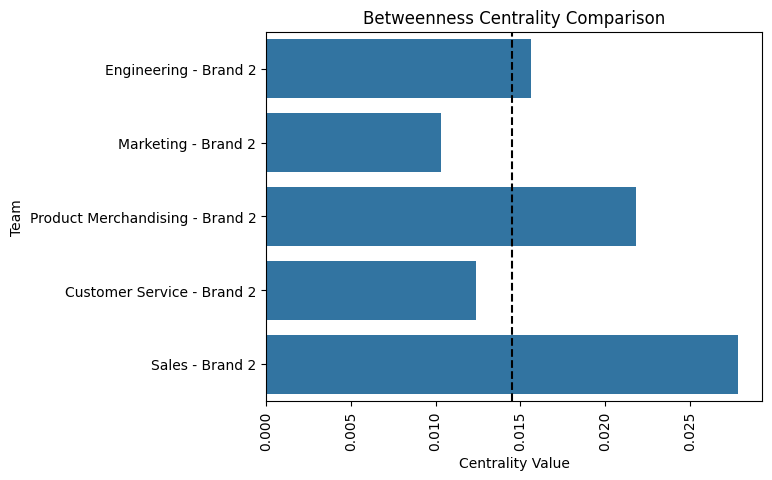

In [19]:
# Construct Bar Chart for betweenness centrality: 

ax = sns.barplot(
    hr_b2, y="Business Unit level 2", x="betweenness_centrality",
    native_scale=True,
    estimator="mean", errorbar=None,
)

#draw a vertical line for the average betweenness centrality of the network
plt.axvline(x=hr_b2['betweenness_centrality'].mean(), 
          color='black', linestyle='--')

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Betweenness Centrality Comparison')
plt.xlabel('Centrality Value')
plt.ylabel('Team')
plt.show()

##### Key Takeaway:

**Betweenness Centrality**:
 - Interpretation: Betweeness centrality measures the extent to which a node lies on the shortest paths between other nodes. High average betweenness centrality indicates that team members often act as bridges, facilitating communication between different parts of the organization.
 - Comparison: Teams with higher average betweenness centrality might play crucial roles in connecting different teams or departments.

**Conclusion**:

The bar chart above shows that there are two teams have relatively high betweenness centrality values which are higher than the average value of the betweenness centrality, including the sales and the product merchandising teams. This could indicates that these three teams play a bridge role to connect different teams or departments in the organization.

On the other hand, the marketing team and the customer service team have a low betweenness centrality, which typically indicates the team with fewer intermediary roles in the network. This means that members of this team are not frequently on the shortest paths between other nodes (teams or individuals), indicating that they do not act as key connectors or brokers of information between different parts of the organization.

##### Characteristics of Teams with Low Betweenness Centrality:

1. **High Internal Connectivity**: These teams might have strong internal connections but fewer connections to other teams. They operate more independently and rely less on external interactions.
2. **Specialized Roles**: Teams with specialized functions that do not require frequent interaction with other departments might exhibit low betweenness centrality.
3. **Closed Networks**: In a closed network, members are highly interconnected with each other, reducing the need for intermediaries³.
4. **Low Influence on Information Flow**: These teams have less influence on the overall flow of information within the organization, as they are not central to the communication pathways⁴.

##### Implications

- **Limited Influence**: Teams with low betweenness centrality may have limited influence on organizational decisions and information dissemination.
- **Potential Silos**: Such teams might operate in silos, focusing on their tasks without much interaction with other parts of the organization.
- **Focused Expertise**: These teams can focus deeply on their specialized tasks without the distraction of cross-departmental communication.



##### Bar Chart for Teams' Average Eigenvector Centrality 

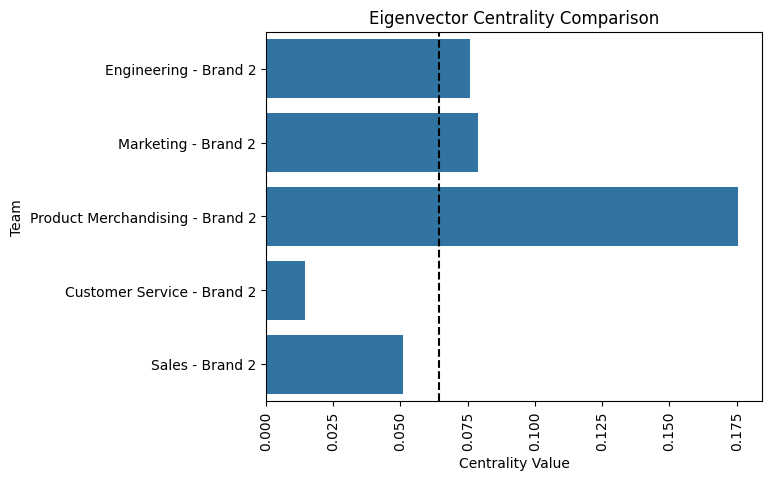

In [20]:
# Construct Bar Chart for eigenvector centrality: 

ax = sns.barplot(
    hr_b2, y="Business Unit level 2", x="eigenvector_centrality",
    native_scale=True,
    estimator="mean", errorbar=None,
)

#add a vertical line for the average eigenvector centrality of the network
plt.axvline(x=hr_b2['eigenvector_centrality'].mean(), 
          color='black', linestyle='--')

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Eigenvector Centrality Comparison')
plt.xlabel('Centrality Value')
plt.ylabel('Team')
plt.show()

##### Key Takeaway:

 **Eigenvector Centrality**:
 - Interpretation: Eigenvector centrality measures the influence of a node based on the importance of its neighbors. High average eigenvector centrality indicates that team members are connected to other influential members in the network.
 - Comparison: Teams with higher average eigenvector centrality might have more influence within the organization.

 **Conclusion**:

 The produt merchandising team has a relatively high eigenvector centrality of 0.175, which indicates these teams are highly influential and well-connected to other influential employees in the organization.

 On the other hand, there are two teams with low eigenvector centrality typically has fewer connections to other highly connected nodes, including the sales and customer service teams. Eigenvector centrality measures not just the number of connections a node has, but also the quality of those connections. Nodes connected to other well-connected nodes have higher eigenvector centrality.

##### Characteristics of Teams with Low Eigenvector Centrality

1. **Peripheral Position**: These teams are often on the periphery of the network, meaning they are not central to the main flow of information and interactions.
2. **Limited Influence**: They have less influence within the organization because they are not connected to the key influencers or central nodes.
3. **Specialized Roles**: Teams with specialized, isolated functions might exhibit low eigenvector centrality because their work does not require extensive interaction with other parts of the organization.
4. **Potential Silos**: These teams might operate in silos, focusing on their tasks without much interaction with other teams.

##### Implications

- **Reduced Access to Information**: Teams with low eigenvector centrality might have limited access to critical information and resources that flow through the network.
- **Lower Visibility**: These teams might be less visible within the organization, which can impact their ability to influence decisions and contribute to broader organizational goals.
- **Focused Expertise**: While they might be less connected, these teams can focus deeply on their specialized tasks without the distraction of extensive cross-departmental communication.



##### Insight for the Product Merchandising Team

The overall result shows that the product merchandising team with the highest average values on degree, closeness, betweenness, and eigenvector centrality in an organizational network analysis, which indicates that this team is likely to be a key player in the organization. Here’s what each of these high centrality measures indicates about the team:

##### Degree Centrality
- **High Connectivity**: The team has a large number of direct connections with other teams or individuals. This suggests they are highly engaged and have numerous direct interactions within the organization.

##### Closeness Centrality
- **Efficient Communication**: The team can quickly reach other teams or individuals within the network. They are well-positioned to disseminate information rapidly and efficiently across the organization.

##### Betweenness Centrality
- **Key Intermediaries**: The team often acts as a bridge between different parts of the network. They play a crucial role in facilitating communication and information flow between otherwise disconnected groups.

##### Eigenvector Centrality
- **Influential Connections**: The team is connected to other highly influential teams or individuals. This indicates that they not only have many connections but also have connections with other important nodes in the network.

##### Implications
- **Strategic Importance**: Such a team is strategically important for the organization. They are likely to be involved in critical projects and decision-making processes.
- **Information Hubs**: They serve as major hubs for information flow, ensuring that knowledge and updates are efficiently spread throughout the organization.
- **Influence and Leadership**: The team likely holds significant influence and leadership within the organization, shaping policies, strategies, and initiatives.



##### Insight for the Customer Service team

The result also tell us that the sales team with relatively low average values on degree, closeness, betweenness and eigenvector centrality in an organizational network analysis, which means that the sales team typically occupy a peripheral position within the network. 

##### Implications
- **Isolated Operations**: Such teams might operate in isolation, focusing on their tasks without much interaction with other parts of the organization.
- **Reduced Access to Information**: They may have limited access to critical information and resources that flow through the network, potentially impacting their performance and decision-making.
- **Lower Visibility**: These teams might be less visible within the organization, which can affect their ability to influence decisions and contribute to broader organizational goals.
- **Specialized Roles**: They might be involved in specialized functions that do not require extensive interaction with other teams.

In [22]:
# The graph is created from the ms_people dataframe of the edges:


# Graph for connection among employees
CG =nx.from_pandas_edgelist(s_people, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
G =nx.from_pandas_edgelist(s_people, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())

# Graph for connection among departments
DG= nx.from_pandas_edgelist(s_people, source= "Business Unit level 2_recipient", 
                            target = "Business Unit level 2_adviser", 
                            edge_attr=True, 
                            create_using=nx.DiGraph())
GG= nx.from_pandas_edgelist(s_people, source= "Business Unit level 2_recipient", 
                            target = "Business Unit level 2_adviser", 
                            edge_attr=True, 
                            create_using=nx.Graph())

In [23]:
# define a function that generating daraframe for each team within the Brand 2

def subset1(level2):
    sub = hr_df[hr_df['Business Unit level 2'] == str(level2)]
    return sub

# define a function that generating daraframe for any business unit outside the Brand 2

def subset(level1):
    sub = hr_df[hr_df['Business Unit level 1'] == str(level1)]
    return sub

lr = subset1('Leadership')
slr = lr[lr['Employee ID'] == 3040598]
seng = subset1('Engineering - Brand 2')
smt = subset1('Marketing - Brand 2')
spm = subset1('Product Merchandising - Brand 2')
ssale = subset1('Sales - Brand 2')
scs = subset1('Customer Service - Brand 2')

opera = subset('Operations')
corp_1 = subset('Corporate')
corp_2 = corp_1[corp_1['Business Unit level 2'] != 'Engineering - Brand 2']
corp = corp_2[corp_2['Employee ID'] != 3040598]


In [24]:
# create a dic mapping employee id with business unit level 2 for network graph

dic_1 = {}
for i in [seng, smt, spm, ssale, scs]:
    for j in range(len(i)):
        dic_1[i['Employee ID'].iloc[j]] = i['Business Unit level 2'].iloc[j]

In [25]:
# mapping colors to each team

colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:blue','tab:cyan']
nodeLegend = {}
keys = ['Engineering - Brand 2', 'Marketing - Brand 2',
        'Product Merchandising - Brand 2', 'Sales - Brand 2', 'Customer Service - Brand 2']
for i in range(len(keys)):
    nodeLegend[keys[i]] = colors[i]
nodeLegend

{'Engineering - Brand 2': 'tab:orange',
 'Marketing - Brand 2': 'tab:green',
 'Product Merchandising - Brand 2': 'tab:red',
 'Sales - Brand 2': 'tab:blue',
 'Customer Service - Brand 2': 'tab:cyan'}

In [26]:
# mapping colors to each employee id

node_color_1 = {node: nodeLegend[community_id] for node, community_id in dic_1.items()}


In [27]:
# extract network connections only occuring in Brand 2 organization

lr_na = s_people[(s_people['Employee ID_recipient'] != 3040598) & (s_people['Employee ID_adviser'] != 3040598)]
sf_em = lr_na['Employee ID_recipient'].unique()
sf_people = lr_na[lr_na['Employee ID_adviser'].isin(sf_em)]
len(sf_people['Employee ID_adviser'].unique())
len(sf_em)

75

In [28]:
# using node shape and node size to differentiate manager and employees in a team

mg = [3021660, 2003036, 2003148, 3042370, 2003155, 2003173]
node_shape ={}
for i in sf_em:
    if i in mg:
        node_shape[i] = 'v'
    else:
        node_shape[i] = 'o'
node_size = {}
for i in sf_em:
    if i in mg:
        node_size[i] = 2
    else:
        node_size[i] = 1

In [29]:
# Subgroup for Brand 2 organization only

SFG = CG.subgraph(list(sf_em))
SFG.number_of_nodes()

75

In [30]:
SFG.number_of_edges()

476

##### The Brand 2 Organization Network Graph

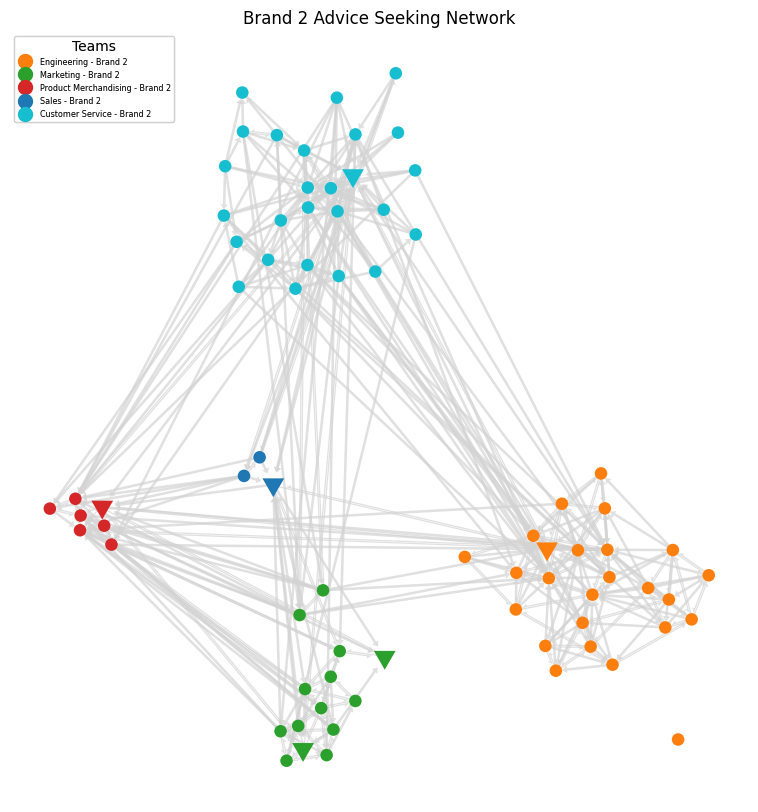

In [31]:
from netgraph import Graph
np.random.seed(0)

fig, ax = plt.subplots(figsize=(15, 10))
ax.axis("off")
Graph(SFG,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='straight', edge_layout_kwargs=dict(k=2000),
      edge_width=0.4, arrows=True, edge_color='lightgrey',
      node_size = node_size, node_shape = node_shape,
)
# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node], 
        marker='o',
        markersize= 10, 
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper left', title='Teams',
                        bbox_to_anchor=(0, 1), fontsize='xx-small')

ax.add_artist(node_legend)
plt.title('Brand 2 Advice Seeking Network', fontsize = 12)
plt.show()

In [32]:
# creating a function for extrcting subset data form ms_people dataset

# connections within a team and among other teams
def ms_sub(team):
    sub_1 = s_people[(s_people['Business Unit level 2_recipient'] == str(team)) |
                      (s_people['Business Unit level 2_adviser'] == str(team))]
    return sub_1

#connections only within a team
def team(unit):
    sub_2 = s_people[(s_people['Business Unit level 2_recipient'] == str(unit)) &
                      (s_people['Business Unit level 2_adviser'] == str(unit))]
    return sub_2

In [33]:
sf_e = list(s_people['Employee ID_recipient'].unique())
new_p = s_people[s_people['Employee ID_adviser'].isin(sf_em)].reset_index(drop=True)
new_p

#connections within a team and among other teams in Brand 2 organization
def sf_sub(team):
    sub_1 = new_p[(new_p['Business Unit level 2_recipient'] == str(team)) |
                      (new_p['Business Unit level 2_adviser'] == str(team))]
    return sub_1

In [34]:
# Creating a dataframe and graph for each team in Brand 2 organization

# Customer Service ---------------------------------------------------------
custom_sf = sf_sub('Customer Service - Brand 2')
CSG_sf =nx.from_pandas_edgelist(custom_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
ICSG_sf =nx.from_pandas_edgelist(custom_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())
# Engineering --------------------------------------------------------------
eng_sf = sf_sub('Engineering - Brand 2')
EG_sf =nx.from_pandas_edgelist(eng_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
IEG_sg =nx.from_pandas_edgelist(eng_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())
# Marketing ----------------------------------------------------------------
mkt_sf = sf_sub('Marketing - Brand 2')
MG_sf =nx.from_pandas_edgelist(mkt_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
IMG_sf =nx.from_pandas_edgelist(mkt_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())
# Product Merchandishing ---------------------------------------------------
pm_sf = sf_sub('Product Merchandising - Brand 2')
PG_sf =nx.from_pandas_edgelist(pm_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
IPG_df =nx.from_pandas_edgelist(pm_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())
# Sales --------------------------------------------------------------------
sales_sf = sf_sub('Sales - Brand 2')
SG_sf =nx.from_pandas_edgelist(sales_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
ISG_sf =nx.from_pandas_edgelist(sales_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())

In [35]:
# Creating a dataframe and graph for each team

# Customer Service ---------------------------------------------------------
only_cus = team('Customer Service - Brand 2')
cs_members = list(hr_df[hr_df['Business Unit level 2'] == 'Customer Service - Brand 2']['Employee ID'])
OCG = CG.subgraph(cs_members)
CIG = G.subgraph(cs_members)
# Engineering ---------------------------------------------------------------
only_eng = team('Engineering - Brand 2')
eng_members = list(hr_df[hr_df['Business Unit level 2'] == 'Engineering - Brand 2']['Employee ID'])
OEG = CG.subgraph(eng_members)
EIG = G.subgraph(eng_members)
# Marketing -----------------------------------------------------------------
only_mkt = team('Marketing - Brand 2')
mkt_members = list(hr_df[hr_df['Business Unit level 2'] == 'Marketing - Brand 2']['Employee ID'])
OMG = CG.subgraph(mkt_members)
MIG = G.subgraph(mkt_members)
# Product Merchdishing ------------------------------------------------------
only_pm = team('Product Merchandising - Brand 2')
pm_members = list(hr_df[hr_df['Business Unit level 2'] == 'Product Merchandising - Brand 2']['Employee ID'])
OPG = CG.subgraph(pm_members)
PIG = G.subgraph(pm_members)
# Sales ---------------------------------------------------------------------
only_sales = team('Sales - Brand 2')
s_members = list(hr_df[hr_df['Business Unit level 2'] == 'Sales - Brand 2']['Employee ID'])
OSG = CG.subgraph(s_members)
SIG = G.subgraph(s_members)



In [36]:
# extract only brand 2 organization people from hr data

sf_1 = hr_df[hr_df['Employee ID'].isin(list(s_people['Employee ID_recipient'].unique()))]
sf_1.head()

,Employee ID,On Site Frequency,Position Title,Date in service,Business Unit level 1,Business Unit level 2
0,3022906,Fully Remote,Sr. Software Development Engineer II,2022-07-18,Corporate,Engineering - Brand 2
2,2003115,Hybrid,Social Media Specialist I,2021-03-01,Brand 2,Marketing - Brand 2
5,3020739,Fully Remote,"Manager, Product Sourcing",2022-03-28,Brand 2,Product Merchandising - Brand 2
6,3043751,Hybrid,Merchandising Specialist II,2024-03-18,Brand 2,Product Merchandising - Brand 2
7,2003109,Fully Remote,Lead Customer Service Representative 5,2021-01-25,Brand 2,Customer Service - Brand 2


##### Cross Functional Collaboration

In [ ]:
# seng = subset1('Engineering - Brand 2')
# smt = subset1('Marketing - Brand 2')
# spm = subset1('Product Merchandising - Brand 2')
# ssale = subset1('Sales - Brand 2')
# scs = subset1('Customer Service - Brand 2')

# opera = subset('Operations')
# lifet = subset('Brand 3')
# corp_1 = subset('Corporate')
# corp_2 = corp_1[corp_1['Business Unit level 2'] != 'Engineering - Brand 2']
# corp = corp_2[corp_2['Employee ID'] != 3040598]
# shfycs = subset('Brand 1 Consumer')

In [37]:
s_people[s_people['Business Unit level 2_recipient'] == 'Leadership']

,Employee ID_recipient,Employee ID_adviser,go to reason,advice area count,energy level,Employment Type_recipient,Position Title_recipient,Date in service_recipient,On Site Frequency_recipient,Business Unit level 1_recipient,Business Unit level 2_recipient,Employment Type_adviser,Position Title_adviser,Date in service_adviser,On Site Frequency_adviser,Business Unit level 1_adviser,Business Unit level 2_adviser
53,3040598,2003155,"Navigating\nChange,Delivering to\nCustomers",2,Stays about the same,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership,Salaried,"Director, Business Line",2018-11-05,Hybrid,Brand 2,Product Merchandising - Brand 2
119,3040598,2003148,"Navigating\nChange,Delivering to\nCustomers",2,Stays about the same,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership,Salaried,"Sr. Director, Marketing",2015-11-16,Hybrid,Brand 2,Marketing - Brand 2
185,3040598,3042370,"Navigating\nChange,Delivering to\nCustomers",2,Stays about the same,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership,Salaried,"Director, Growth - Brand 2",2023-11-27,Fully Remote,Brand 2,Marketing - Brand 2
252,3040598,3021660,Technical\nExpertise,1,Goes down,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership,Salaried,"Sr. Director, eCommerce",2022-05-09,Hybrid,Corporate,Engineering - Brand 2
315,3040598,2003036,Delivering to\nCustomers,1,Goes down,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership,Salaried,"Director, Sales",2021-02-15,Hybrid,Brand 2,Sales - Brand 2
367,3040598,2003173,"Navigating\nChange,Delivering to\nCustomers",2,Stays about the same,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership,Salaried,"Sr. Manager, Customer Service",2014-03-24,Hybrid,Brand 2,Customer Service - Brand 2
418,3040598,3033414,"Financial\nResources,Delivering to\nCustomers",2,Stays about the same,Salaried,"VP, GM Brand 2",2023-10-04,Fully Remote,Corporate,Leadership,Salaried,Sr. Merchandising Specialist I,2023-04-10,Fully Remote,Brand 2,Product Merchandising - Brand 2


In [38]:
# a function to calculate corss functional collaboration percentage

key1 = ['Engineering - Brand 2', 'Marketing - Brand 2',
        'Product Merchandising - Brand 2', 'Customer Service - Brand 2',
        'Sales - Brand 2', 'Leadership']
  
def cb_p(team, teams):
        ms_team = s_people[s_people['Business Unit level 2_recipient'] == str(team)]
        if str(teams) in keys:
                sub = subset1(str(teams))
                t_t = ms_team[ms_team['Employee ID_adviser'].isin(list(sub['Employee ID']))]
                percent = len(t_t)/len(ms_team)
        elif teams == 'Leadership':
                lr = subset1('Leadership')
                sub = lr[lr['Employee ID'] == 3040598]
                t_t = ms_team[ms_team['Employee ID_adviser'].isin(list(sub['Employee ID']))]
                percent = len(t_t)/len(ms_team)
        elif teams == 'Operations':
                sub = subset('Operations')
                t_t = ms_team[ms_team['Employee ID_adviser'].isin(list(sub['Employee ID']))]
                percent = len(t_t)/len(ms_team)
        # elif teams == 'Brand 3':
        #         sub = subset('Brand 3')
        #         t_t = ms_team[ms_team['Employee ID_adviser'].isin(list(sub['Employee ID']))]
        #         percent = len(t_t)/len(ms_team)
        elif teams == 'Corporate':
                corp_1 = subset('Corporate')
                corp_2 = corp_1[corp_1['Business Unit level 2'] != 'Engineering - Brand 2']
                sub = corp_2[corp_2['Employee ID'] != 3040598]
                t_t = ms_team[ms_team['Employee ID_adviser'].isin(list(sub['Employee ID']))]
                percent = len(t_t)/len(ms_team)
        # elif teams == 'Brand 1 Consumer':
        #         sub = subset('Brand 1 Consumer')
        #         t_t = ms_team[ms_team['Employee ID_adviser'].isin(list(sub['Employee ID']))]
        #         percent = len(t_t)/len(ms_team)
        return round(percent, 2)


In [39]:
# collaboration percentage table

key2 = ['Engineering - Brand 2', 'Marketing - Brand 2',
        'Product Merchandising - Brand 2', 'Customer Service - Brand 2',
        'Sales - Brand 2', 'Leadership',  'Operations', 'Corporate']
collaboration_df = pd.DataFrame(columns = key2, index = key1)
values = []
for i in key1:
    for j in key2:
        p = cb_p(str(i), str(j))
        collaboration_df.loc[i, j] = p
        values.append(p)
collaboration_df

,Engineering - Brand 2,Marketing - Brand 2,Product Merchandising - Brand 2,Customer Service - Brand 2,Sales - Brand 2,Leadership,Operations,Corporate
Engineering - Brand 2,0.85,0.0,0.05,0.01,0.01,0.02,0.0,0.06
Marketing - Brand 2,0.04,0.59,0.21,0.03,0.04,0.03,0.01,0.06
Product Merchandising - Brand 2,0.07,0.18,0.54,0.02,0.0,0.02,0.1,0.08
Customer Service - Brand 2,0.17,0.06,0.09,0.61,0.03,0.01,0.01,0.03
Sales - Brand 2,0.04,0.15,0.23,0.15,0.15,0.04,0.08,0.15
Leadership,0.14,0.29,0.29,0.14,0.14,0.0,0.0,0.0


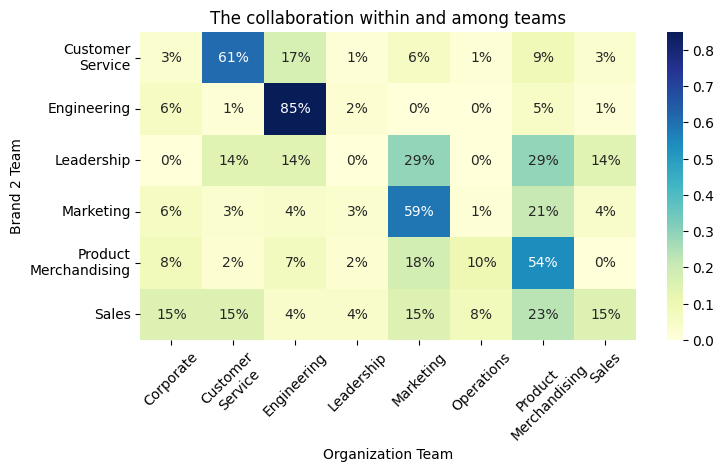

In [40]:
# plot a cross functional collaboraton heatmmap

degree_df = pd.DataFrame()
index = []
col = []
cor_percent = []
for i in key1:
    for j in key2:
        p = cb_p(str(i), str(j))
        index.append(i)
        col.append(j)
        cor_percent.append(p)

degree_df['Teams 1'] = index
degree_df['Teams 2'] = col
degree_df['percent'] = cor_percent

result = degree_df.pivot(index="Teams 1", columns="Teams 2", values="percent")
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(result, cmap="YlGnBu", annot=True, fmt=".0%")
plt.title('The collaboration within and among teams')
plt.xlabel('Organization Team')
plt.ylabel('Brand 2 Team')

plt.xticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5], 
           labels = ['Corporate', 'Customer\nService', 'Engineering',
                     'Leadership', 'Marketing', 'Operations',
                     'Product\nMerchandising', 'Sales'], 
           rotation = 45)
plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
           labels = ['Customer\nService', 'Engineering', 'Leadership',
                     'Marketing', 'Product\nMerchandising', 'Sales'], 
                     )
plt.show()

##### Insight from the heatmap:

##### Collaboration across Functional Boundaries

In [41]:
b2 = s_people[s_people['Employee ID_adviser'].isin(
    list(s_people['Employee ID_recipient'].unique())
)]
# b2 = 426


pm_net = b2[(b2['Business Unit level 2_recipient'] == 'Product Merchandising - Brand 2') |
   (b2['Business Unit level 2_adviser'] == 'Product Merchandising - Brand 2')]
#164
pm1 = pm_net[(pm_net['Business Unit level 2_recipient'] == 'Product Merchandising - Brand 2')&
    (pm_net['Business Unit level 2_adviser'] == 'Product Merchandising - Brand 2')]

H = CG.subgraph(list(seng['Employee ID']))
H.number_of_edges()


pmmk = b2[(b2['Business Unit level 2_recipient'].isin(
    ['Product Merchandising - Brand 2', 'Marketing - Brand 2'])) |
   (b2['Business Unit level 2_adviser'].isin(
      ['Product Merchandising - Brand 2', 'Marketing - Brand 2']))]
pmmk1 = pmmk[(pmmk['Business Unit level 2_recipient'] == 'Product Merchandising - Brand 2')&
     (pmmk['Business Unit level 2_adviser'] == 'Marketing - Brand 2')]
pmmk2 = pmmk[(pmmk['Business Unit level 2_adviser'] == 'Product Merchandising - Brand 2')&
     (pmmk['Business Unit level 2_recipient'] == 'Marketing - Brand 2')]


(len(pmmk1) + len(pmmk2))/len(pmmk)


0.15254237288135594

In [42]:
def colla(team1, team2):
    if str(team1) == str(team2):
        net = b2[(b2['Business Unit level 2_recipient'] == str(team1)) |
                 (b2['Business Unit level 2_adviser'] == str(team2))]
        n1 = net[(net['Business Unit level 2_recipient'] == str(team1))&
                 (net['Business Unit level 2_adviser'] == str(team2))]
        p= round(len(n1)/len(net),2)
    else:
        net2 = b2[(b2['Business Unit level 2_recipient'].isin([str(team1), str(team2)]))|
                  (b2['Business Unit level 2_adviser'].isin([str(team1), str(team2)]))]
        n2 = net2[(net2['Business Unit level 2_recipient'] == str(team1))&
                  (net2['Business Unit level 2_adviser'] == str(team2))]
        n3 = net2[(net2['Business Unit level 2_adviser'] == str(team1))&
                  (net2['Business Unit level 2_recipient'] == str(team2))]
        p = round((len(n2) + len(n3))/len(net2), 2)

    return p

In [43]:
keys = ['Customer Service - Brand 2', 'Engineering - Brand 2', 
        'Marketing - Brand 2', 'Leadership',
        'Product Merchandising - Brand 2', 'Sales - Brand 2']

new_df = pd.DataFrame(columns = keys, index = keys)

for i in keys:
    for j in keys:
        pcent = colla(str(i), str(j))
        new_df.loc[i, j] = pcent
        
new_df

,Customer Service - Brand 2,Engineering - Brand 2,Marketing - Brand 2,Leadership,Product Merchandising - Brand 2,Sales - Brand 2
Customer Service - Brand 2,0.64,0.07,0.05,0.01,0.05,0.05
Engineering - Brand 2,0.07,0.78,0.01,0.02,0.03,0.01
Marketing - Brand 2,0.05,0.01,0.51,0.04,0.15,0.06
Leadership,0.01,0.02,0.04,0.0,0.03,0.04
Product Merchandising - Brand 2,0.05,0.03,0.15,0.03,0.34,0.05
Sales - Brand 2,0.05,0.01,0.06,0.04,0.05,0.13


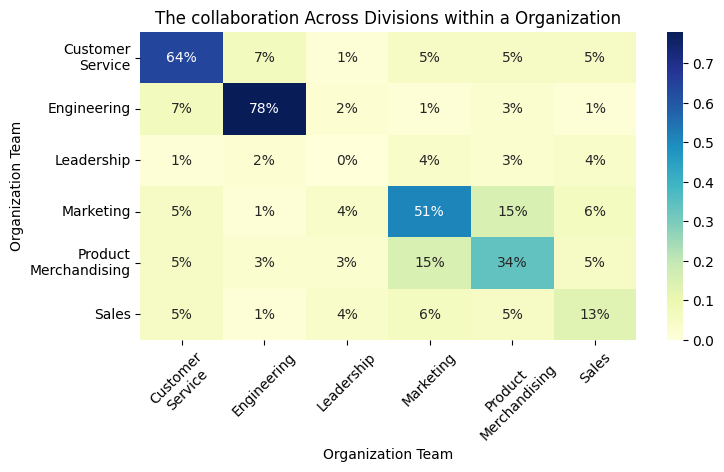

In [44]:
connet_df = pd.DataFrame()
index = []
col = []
percent = []
for i in keys:
    for j in keys:
        pc = colla(str(i), str(j))
        index.append(i)
        col.append(j)
        percent.append(pc)

connet_df['Teams 1'] = index
connet_df['Teams 2'] = col
connet_df['percent'] = percent

result = connet_df.pivot(index="Teams 1", columns="Teams 2", values="percent")
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(result, cmap="YlGnBu", annot=True, fmt=".0%")
plt.title('The collaboration Across Divisions within a Organization')
plt.xlabel('Organization Team')
plt.ylabel('Organization Team')

plt.xticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
           labels = ['Customer\nService', 'Engineering',
                     'Leadership', 'Marketing',
                     'Product\nMerchandising', 'Sales'], 
           rotation = 45)
plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
           labels = ['Customer\nService', 'Engineering', 'Leadership',
                     'Marketing', 'Product\nMerchandising', 'Sales'], 
                     )
plt.show()

In [45]:
# Calculate average density at a team level or join team level

def sfden(team1, team2):
    if str(team1) == str(team2):
        df = sf_1[sf_1['Business Unit level 2'] == str(team1)]
        G = CG.subgraph(list(df['Employee ID']))
        den= nx.density(G)
    else:
        df1 = sf_1[sf_1['Business Unit level 2'] == str(team1)]
        df2 = sf_1[sf_1['Business Unit level 2'] == str(team2)]
        new_list = list(df1['Employee ID']) + list(df2['Employee ID'])
        G = CG.subgraph(new_list)
        den= nx.density(G)
    return den

([<matplotlib.axis.YTick at 0x1f22a5b7090>,
 [Text(0, 0.5, 'Customer Service'),
  Text(0, 1.5, 'Engineering'),
  Text(0, 2.5, 'Leadership'),
  Text(0, 3.5, 'Marketing'),
  Text(0, 4.5, 'Product Merchandising'),
  Text(0, 5.5, 'Sales')])

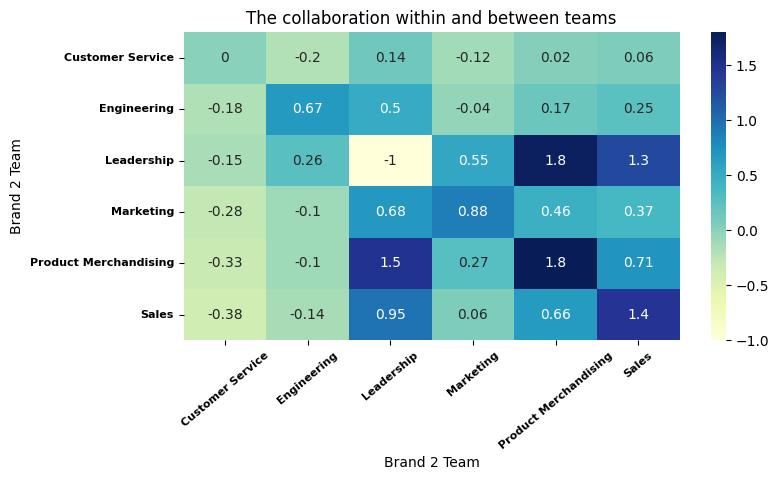

In [46]:
den_df1 = pd.DataFrame()
index = []
col = []
density = []
ds = []
for i in keys:
    for j in keys:
        d = sfden(str(i), str(j))
        ds.append(d)
        d1 = round((d - sum(ds)/len(ds))/(sum(ds)/len(ds)), 2)
        index.append(i)
        col.append(j)
        density.append(d1)

den_df1['Teams 1'] = index
den_df1['Teams 2'] = col
den_df1['density'] = density

result = den_df1.pivot(index="Teams 1", columns="Teams 2", values="density")
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(result, cmap="YlGnBu", annot=True)
plt.title('The collaboration within and between teams')
plt.xlabel('Brand 2 Team')
plt.ylabel('Brand 2 Team')
plt.xticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
           labels = ['Customer Service', 'Engineering', 'Leadership', 
                     'Marketing', 'Product Merchandising', 'Sales'], 
           rotation=40, fontsize=8, fontweight='bold')
plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
           labels = ['Customer Service', 'Engineering', 'Leadership',
                     'Marketing', 'Product Merchandising', 'Sales'], 
           fontsize = 8, fontweight='bold')

In [47]:
sf_df = hr_df[hr_df['Employee ID'].isin(sf_em)].reset_index(drop=True)

connects = CG.degree()
connects_sf = SFG.degree()

a = [i[1] for i in list(connects_sf)]
b = [i[0] for i in list(connects_sf)]
new_c = pd.DataFrame()
new_c['Employee ID'] = b
new_c['Degree'] = a



In [49]:
from datetime import datetime
from datetime import date

sfa = s_people['Employee ID_recipient'].unique()
sf_df = hr_df[hr_df['Employee ID'].isin(sfa)].reset_index(drop=True) #sh_em for 75 employees w/o vp

sf_df['Date in service'] = pd.to_datetime(sf_df['Date in service'])

today = date.today()
sf_df['Years in service'] = [round((today - datetime.date(i)).days/365, 2) 
                                        for i in sf_df['Date in service']]


sf_df.head()

,Employee ID,On Site Frequency,Position Title,Date in service,Business Unit level 1,Business Unit level 2,Years in service
0,3022906,Fully Remote,Sr. Software Development Engineer II,2022-07-18,Corporate,Engineering - Brand 2,2.21
1,2003115,Hybrid,Social Media Specialist I,2021-03-01,Brand 2,Marketing - Brand 2,3.59
2,3020739,Fully Remote,"Manager, Product Sourcing",2022-03-28,Brand 2,Product Merchandising - Brand 2,2.51
3,3043751,Hybrid,Merchandising Specialist II,2024-03-18,Brand 2,Product Merchandising - Brand 2,0.54
4,2003109,Fully Remote,Lead Customer Service Representative 5,2021-01-25,Brand 2,Customer Service - Brand 2,3.68


In [50]:
c = [i[1] for i in list(connects)]
e = [i[0] for i in list(connects)]
new_c1 = pd.DataFrame()
new_c1['Employee ID'] = e
new_c1['Degree'] = c
new_c2 = new_c1[new_c1['Employee ID'].isin(list(sf_1['Employee ID']))].reset_index(drop=True) #sf_em
new_c2

,Employee ID,Degree
0,3029869,23
1,2002956,23
2,2003137,16
3,2003173,32
4,3021660,27
...,...,...
71,3042755,16
72,2002252,7
73,2002936,9
74,3025972,9


In [51]:
new_sf = sf_1.merge(new_c2, how="left", left_on="Employee ID", right_on="Employee ID") #sf_df
max(new_sf['Degree'])
new_sf['Degree'].describe()

count    76.000000
mean     14.118421
std       6.641219
min       2.000000
25%       9.000000
50%      13.000000
75%      17.250000
max      33.000000
Name: Degree, dtype: float64

<Axes: xlabel='Degree', ylabel='Count'>

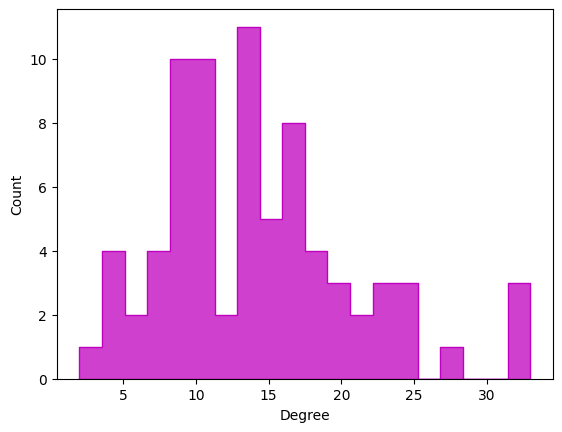

In [52]:
# histogram for brand 2 degree distribution

sns.histplot(x="Degree", bins=20, data= new_sf, element="step", color="m")

In [53]:
# Brand 2 network degree variable statistic information

new_sf1 = sf_df.merge(new_c2, how="left", left_on="Employee ID", right_on="Employee ID")
new_sf1['Degree'].describe()

count    76.000000
mean     14.118421
std       6.641219
min       2.000000
25%       9.000000
50%      13.000000
75%      17.250000
max      33.000000
Name: Degree, dtype: float64

In [54]:
new_sf1['Years in service'].describe()
#sns.histplot(x="Years in service", bins=20, data= new_sf1, element="step", color="m")

count    76.000000
mean      4.396974
std       3.494962
min       0.440000
25%       1.920000
50%       3.400000
75%       6.342500
max      12.290000
Name: Years in service, dtype: float64

Text(0.5, 0, 'Years in Service')

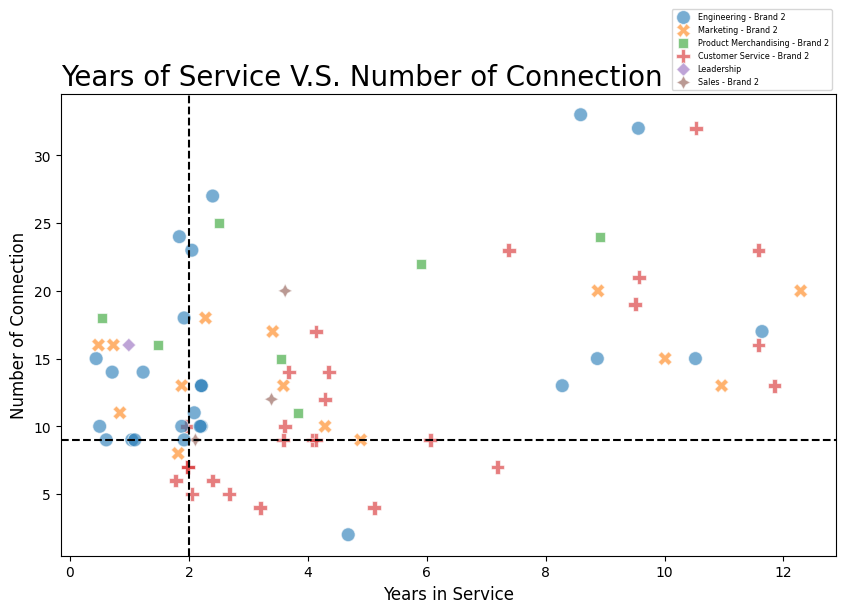

In [55]:
# scatter plot for year of service against number of connection

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=new_sf1, x="Years in service", y="Degree", 
                style="Business Unit level 2", hue= 'Business Unit level 2',
                alpha= 0.6, s= 100)
plt.axhline(y = 9, color = 'black', linestyle = '--') 
plt.axvline(x = 2, color = 'black', linestyle = '--') 
plt.legend(loc='lower right', bbox_to_anchor=(1, 1), fontsize='xx-small')
plt.title('Years of Service V.S. Number of Connection', fontsize = 20, loc='left')
plt.ylabel('Number of Connection', fontsize = 12)
plt.xlabel('Years in Service', fontsize = 12)